In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

***Loading the DataSet***

In [ ]:
dataset = pd.read_csv('/content/chronic kidney disease.csv')

In [ ]:
dataset.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [ ]:
dataset.shape

(400, 14)

In [ ]:
dataset.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
dataset.isnull().sum()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0
Bu,0
Sc,0
Sod,0
Pot,0
Hemo,0


*1 ------> Person have chronic kidney disease*

*0-------->Person does not have chronic kidney disease*

In [ ]:
dataset = dataset.rename(columns = {'Class':'Target'})

*Finding the Correlation Values*

In [ ]:
correlation = dataset.corr()

<Axes: >

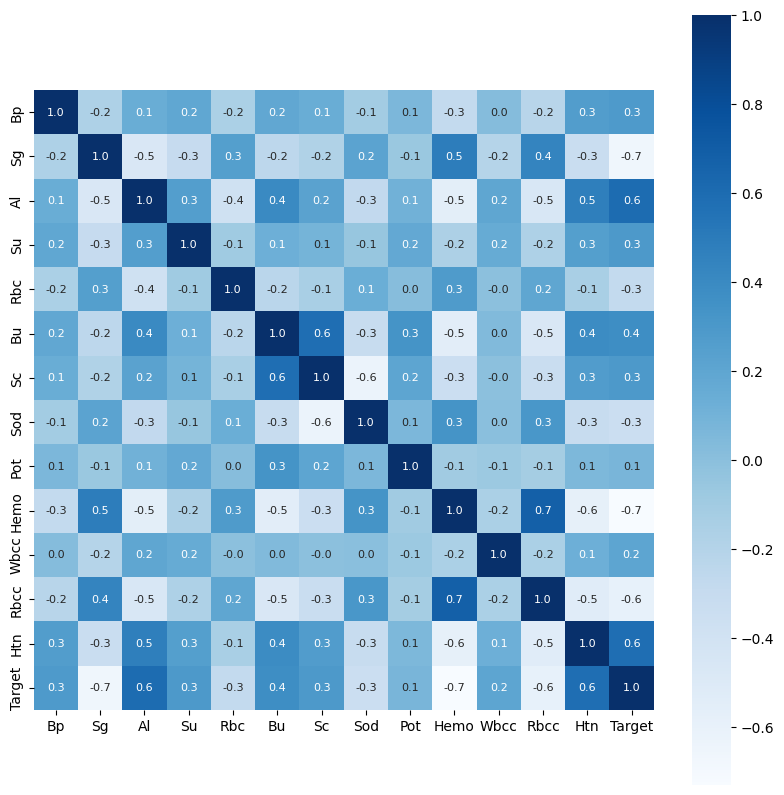

In [ ]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

*Spliting the dataset into Train and Test*

In [ ]:
X = dataset.drop(columns='Target',axis=1)
Y = dataset['Target']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(400, 13) (320, 13) (80, 13)


*Standard the Data*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVC()
parameters = {
    'kernel':['linear','sigmoid','poly','rbf'],
    'C':[1,5,10,20]
}
#grid search
grid = GridSearchCV(model,parameters,cv=5)
grid.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']})

In [ ]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00361743, 0.00398641, 0.00454135, 0.00435486, 0.00432758,
       0.00294805, 0.00355992, 0.00421438, 0.00327973, 0.00317354,
       0.0033216 , 0.00282712, 0.00283337, 0.00304661, 0.00323424,
       0.00330453]), 'std_fit_time': array([0.00043879, 0.00038089, 0.00017019, 0.00098614, 0.00151852,
       0.00015658, 0.00025492, 0.00129522, 0.00099222, 0.00089085,
       0.00046995, 0.00029013, 0.00021221, 0.00023935, 0.00056133,
       0.00023472]), 'mean_score_time': array([0.00172834, 0.00192866, 0.00197582, 0.00224447, 0.0015245 ,
       0.00149722, 0.00173049, 0.00185404, 0.00137272, 0.00147152,
       0.0015636 , 0.00151191, 0.00134096, 0.00156713, 0.00160561,
       0.00172462]), 'std_score_time': array([1.10871397e-04, 3.12837760e-04, 6.86089635e-05, 6.77441260e-04,
       4.35134221e-05, 2.09601224e-04, 1.86898963e-04, 1.18731935e-04,
       3.76464673e-05, 7.66442126e-05, 1.47083929e-04, 1.57037079e-04,
       8.28665059e-05, 1.42061306e-04, 1.63185115e

In [ ]:
# loading the data into pandas data frame
data = pd.DataFrame(grid.cv_results_)
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003617,0.000439,0.001728,0.000111,1,linear,"{'C': 1, 'kernel': 'linear'}",0.968750,0.984375,0.953125,1.0,0.953125,0.971875,0.018222,8
1,0.003986,0.000381,0.001929,0.000313,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.968750,0.984375,0.953125,1.0,0.968750,0.975000,0.015934,5
2,0.004541,0.000170,0.001976,0.000069,1,poly,"{'C': 1, 'kernel': 'poly'}",0.984375,0.937500,0.968750,1.0,0.921875,0.962500,0.028980,15
3,0.004355,0.000986,0.002244,0.000677,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.984375,0.953125,1.0,0.968750,0.981250,0.018222,2
4,0.004328,0.001519,0.001524,0.000044,5,linear,"{'C': 5, 'kernel': 'linear'}",0.968750,0.984375,0.953125,1.0,0.953125,0.971875,0.018222,8


In [ ]:
# grid search result
data[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.971875
1,1,sigmoid,0.975000
2,1,poly,0.962500
3,1,rbf,0.981250
4,5,linear,0.971875
5,5,sigmoid,0.975000
6,5,poly,0.981250
7,5,rbf,0.975000
8,10,linear,0.971875
9,10,sigmoid,0.965625


In [ ]:
print(grid.best_params_)

{'C': 20, 'kernel': 'poly'}


**Model Train**

*Support vector Classifier*

In [ ]:
model = SVC(kernel='poly',C=20)

**Cross Validation**

In [ ]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train,Y_train, cv=5)
print("Cross-Validation Accuracy:", scores)

Cross-Validation Accuracy: [1.       1.       0.984375 1.       0.953125]


In [ ]:
model.fit(X_train,Y_train)

SVC(C=20, kernel='poly')

**Model Evaluvation**

*In Training Samples*

In [ ]:
y_train_prediction = model.predict(X_train)

In [ ]:
print("Accuracy Score: ",accuracy_score(Y_train,y_train_prediction))
print("Precision Score: ",precision_score(Y_train,y_train_prediction))
print("Recall Score: ",recall_score(Y_train,y_train_prediction))
print("F1 Score: ",f1_score(Y_train,y_train_prediction))

Accuracy Score:  0.99375
Precision Score:  0.99
Recall Score:  1.0
F1 Score:  0.9949748743718593


In [ ]:
print(confusion_matrix(Y_train,y_train_prediction))

[[120   2]
 [  0 198]]


*In Testing Samples*

In [ ]:
y_test_prediction = model.predict(X_test)

In [ ]:
print("Accuracy Score: ",accuracy_score(Y_test,y_test_prediction))
print("Precision Score: ",precision_score(Y_test,y_test_prediction))
print("Recall Score: ",recall_score(Y_test,y_test_prediction))
print("F1 Score: ",f1_score(Y_test,y_test_prediction))

Accuracy Score:  0.9875
Precision Score:  1.0
Recall Score:  0.9807692307692307
F1 Score:  0.9902912621359223


In [ ]:
print(confusion_matrix(Y_test,y_test_prediction))

[[28  0]
 [ 1 51]]


*Building the Model*

In [ ]:
input_data = (70.0,1.01,0.0,0.0,1.0,54.0,24.0,104.0,4.0,12.4,8406.0,4.71,0.0)
features = ['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn']

input_data_as_dataframe = pd.DataFrame([input_data],columns = features)

# standardizing the input data
std_data = scaler.transform(input_data_as_dataframe)
prediction = model.predict(std_data)
if(prediction[0]==1):
  print("Person have chronic kidney disease")
else:
  print("Person does not have chronic kidney disease")

Person have chronic kidney disease


In [ ]:
import pickle
pickle.dump(model,open('ChronicKidneyDisease.save','wb'))